# Build Linear Regression Model

**Key objectives**:

- Build simple linear regression model with 'price' as the target and the most correlated variable as the feature
- Interpret the model summary
- Visualize the model residuals
- Predict new 'price' values with the model

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../Course Materials/Data/Computers.csv')
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [3]:
df.corr(numeric_only=True)

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


<Axes: >

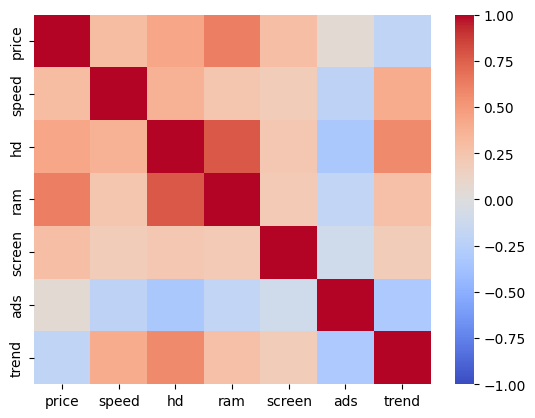

In [5]:
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, cmap='coolwarm')

In [6]:
X = sm.add_constant(df['ram'])
X

,const,ram
0,1.0,4
1,1.0,2
2,1.0,4
3,1.0,8
4,1.0,16
...,...,...
6254,1.0,8
6255,1.0,16
6256,1.0,24
6257,1.0,16


In [7]:
y = df['price']
y

0       1499
1       1795
2       1595
3       1849
4       3295
        ... 
6254    1690
6255    2223
6256    2654
6257    2195
6258    2490
Name: price, Length: 6259, dtype: int64

In [9]:
model_lr = sm.OLS(y, X).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     3964.
Date:                Sun, 14 Dec 2025   Prob (F-statistic):               0.00
Time:                        03:15:36   Log-Likelihood:                -47180.
No. Observations:                6259   AIC:                         9.436e+04
Df Residuals:                    6257   BIC:                         9.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1687.2925     10.221    165.073      0.000    1667.255    1707.330
ram           64.2316      1.020     62.959      0.000      62.232      66.232
==============================================================================
Omnibus:                     1327.783   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3113.140
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       5.508   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
rams =[1,2,4,6,8,12,20,32,64]
ram_predict = sm.add_constant(pd.DataFrame({'ram':rams}))
ram_predict

,const,ram
0,1.0,1
1,1.0,2
2,1.0,4
3,1.0,6
4,1.0,8
5,1.0,12
6,1.0,20
7,1.0,32
8,1.0,64


In [11]:
model_lr.predict(ram_predict)

0    1751.524163
1    1815.755790
2    1944.219043
3    2072.682297
4    2201.145550
5    2458.072057
6    2971.925070
7    3742.704591
8    5798.116644
dtype: float64

In [14]:
predictions = model_lr.predict(ram_predict)
predictions.index = rams
predictions

1     1751.524163
2     1815.755790
4     1944.219043
6     2072.682297
8     2201.145550
12    2458.072057
20    2971.925070
32    3742.704591
64    5798.116644
dtype: float64

<Axes: ylabel='None'>

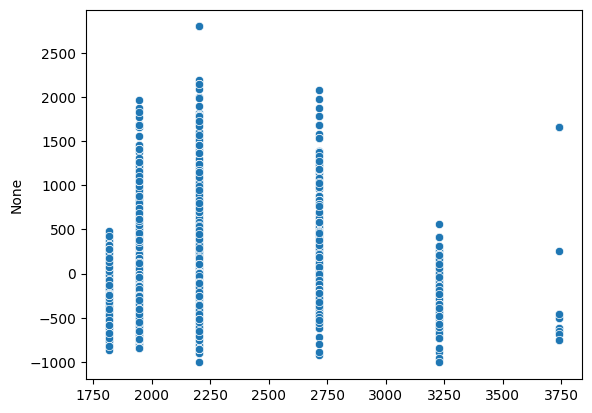

In [13]:
sns.scatterplot(x = model_lr.predict(), y =model_lr.resid)